In [1]:
import DatasetPrepare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
#Load data and create new column
df = pd.DataFrame(DatasetPrepare.getFujiDatasets())
df['y'] = df['Fuji'].shift(-1)
df = df.dropna(subset=['y'])
df['baseline_pred'] = df['Fuji']

In [3]:
#Preparing data (Feature and Target)
X_train = df['Fuji'].values.reshape(-1,1)
y_train = df['y'].values.reshape(-1,1)
X_test = df['Fuji'].values.reshape(-1,1)

In [4]:
#Initialize Random Forest Regressor Model
random_reg = RandomForestRegressor()

#Fit the model
random_reg.fit(X_train, y_train)
#Make predictions
predictions_random = random_reg.predict(X_test)

#Assign predictions to new column
df['random_pred'] = predictions_random

#Evaluate
random_mae = mean_absolute_error(y_train, predictions_random)
random_mse = mean_squared_error(y_train, predictions_random)
random_r2 = r2_score(y_train, predictions_random)
print("MAE", random_mae)
print("MSE", random_mse)
print("R-squared:", random_r2)

MAE 5741.729494047619
MSE 85373480.72458112
R-squared: 0.9305542206823848


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [5]:
#Initialize Gradient Boosting Regressor Model
gradient_reg = GradientBoostingRegressor()

#Fit the model
gradient_reg.fit(X_train, y_train)

#Make predictions
predictions_gradient = gradient_reg.predict(X_test)

#Assign predictions to new column
df['gradient_pred'] = predictions_gradient

#Evaluate
gradient_mae = mean_absolute_error(y_train, predictions_gradient)
gradient_mse = mean_squared_error(y_train, predictions_gradient)
gradient_r2 = r2_score(y_train, predictions_gradient)
print("MAE", gradient_mae)
print("MSE", gradient_mae)
print("R-squared:", gradient_r2)

MAE 6481.856738418709
MSE 6481.856738418709
R-squared: 0.9344597554013522


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_gb.py:424: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
#Initialize Ada Boost Regressor Model
ada_reg = AdaBoostRegressor()

#Fit the model
ada_reg.fit(X_train, y_train)

#Make predictions
predictions_ada = ada_reg.predict(X_test)

#Assign predictions to new column
df['ada_pred'] = predictions_ada

#Evaluate
ada_mae = mean_absolute_error(y_train, predictions_ada)
ada_mse = mean_squared_error(y_train, predictions_ada)
ada_r2 = r2_score(y_train, predictions_ada)
print("MAE", ada_mae)
print("MSE", ada_mse)
print("R-squared:", gradient_r2)

MAE 12712.058599435448
MSE 318075391.55010784
R-squared: 0.9344597554013522


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


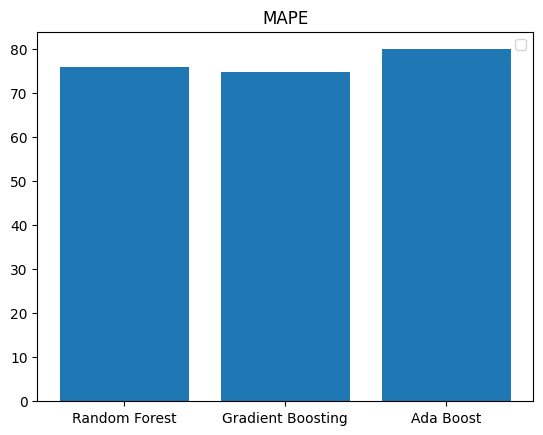

In [7]:
#Implement Mape Function
def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)
  
random_mape = mape(y_train, predictions_random)
gradient_mape = mape(y_train, predictions_gradient)
ada_mape = mape(y_train, predictions_ada)

x = np.array(["Random Forest", "Gradient Boosting", "Ada Boost"])
y = np.array([random_mape, gradient_mape, ada_mape])

plt.bar(x,y)
plt.title('MAPE')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


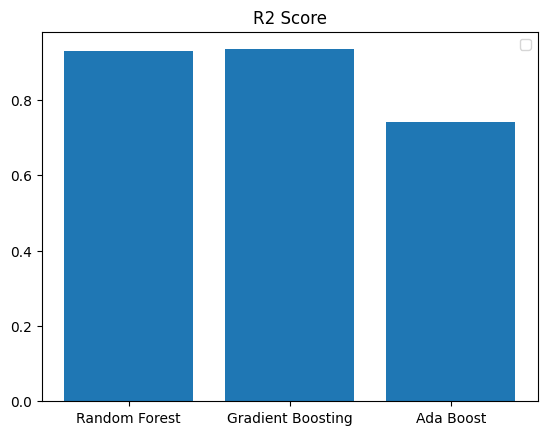

In [8]:
x = np.array(["Random Forest", "Gradient Boosting", "Ada Boost"])
y = np.array([random_r2, gradient_r2, ada_r2])

plt.bar(x,y)
plt.title('R2 Score')
plt.legend()
plt.show()